# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 17__

__Nombres de los estudiantes: David del Cerro Domínguez y Sergio Ramos Mesa__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [2]:
#Utilizando la librería pandas creamos un dataframe desde un csv
#Posteriormente ordenamos 
#Eliminamos la columna deseada utilizando del (también se puede utilizar drop de dataframe)
#Eliminamos las columnas y filas con al menos un elemento nulo nAn
#Mostramos

import pandas as pd
import numpy as np

df1 = pd.read_csv('countries_of_the_world.csv')  
df1.sort_values(by=['Country'])
del df1["Region"]
df1.dropna(inplace=True)
    
df1

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


Como podemos apreciar en los datos tenemos un dataframe compuesto por 179 países diferentes que contienen un total de 19 variables.

- Estas variables son las siguientes:
- Country
- Region
- Population
- Area (sq. mi.)
- Pop. Density (per sq. mi.)
- Coastline (coast/area ratio)
- Net migration
- Infant mortality (per 1000 births)
- GDP ($ per capita)
- Literacy (%)
- Phones (per 1000)
- Arable (%)
- Crops(%)
- Other (%)
- Climate
- Birthrate
- Deathrate
- Agriculture
- Industry
- Service

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [3]:
#Creamos un nuevo dataframe con las columnas que nos interesan a traves de df1 y mostramos
#Esto nos sirve para visualizar los datos. Porteriormente veremos las distribuciones y correlación
#entre variables
df2 = df1[["GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Agriculture", "Industry", "Service"]]
df2

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,700.0,36.0,3.2,0.380,0.240,0.380
1,4500.0,86.5,71.2,0.232,0.188,0.579
2,6000.0,70.0,78.1,0.101,0.600,0.298
6,8600.0,95.0,460.0,0.040,0.180,0.780
7,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
218,4800.0,93.4,140.1,0.040,0.419,0.541
219,2500.0,90.3,187.7,0.209,0.410,0.381
224,800.0,50.2,37.2,0.135,0.472,0.393
225,800.0,80.6,8.2,0.220,0.290,0.489


Las variables representadas en este segundo dataframe representan el estado de la economía de cada país. Vistas las variables una a una (por su traducción)

- Producto interior bruto (gross domestic produc)
- Literatura (Muestra el nivel de analfabetismo)
- Telefonos por cada 1000 habitantes
- Agricultura, Industria y Servicios (Nivel de aportación de cada uno de los sectores a la economía sobre 1)

Una vez cargado el datafrme. Pasamos al análisis de las distribuciones  y datos obtenidos.

Para ver la distribución de los datos utilizaremos un diagrama de dispersión (seaborn)

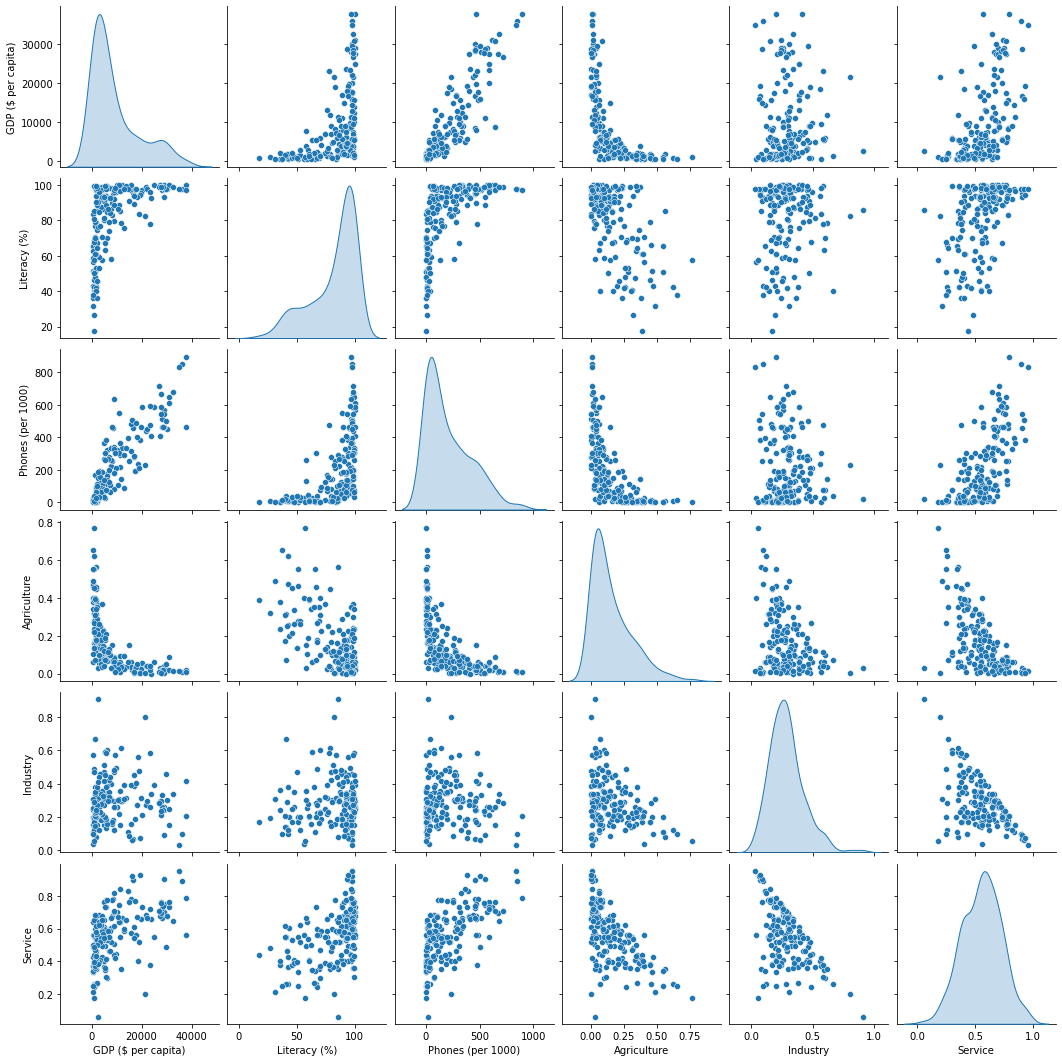

In [4]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

Como hemos mencionado antes, al tratar con 179 países este será el count sobre el que están representadas las gráficas. 

Se puede ver como los Servicios y la industria están relacionados entre sí debido a las dispersiones con el resto de variables. Podemos ver también como estos son, concretamente, inversamente proporcionales si miramos su relacion en la gráfica. 

Literatura está muy relcionada con todas las variables. Cuanto mayor literatura más posibilidad de tener el resto de variables altas. 

Veamos a continuación una descripción más detallada de las variables y su correlación.

### Datos de la tabla

Para ver en más detalle la correlación entre variables nos ayudaremos de la tabla de descripción (para conocer los datos exactos individuales) y del indice de correlación de Pearson entre cada una de las variables (par comprar entre ellas)

In [5]:
df2.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


Las conlusiones sacadas en claro a traves de los datos son las siguientes:

Para el GPD ( $ per capita) tenemos una media de 9125 dolares y una desviación de 9644 lo que indica una gran disparidad en los datos. Hecho que nos indica también el 25% -> 1800 y el 75% ->12950, donde se ve también la disparidad. Esta variable tiene una dependencia tanto con el grado de alfabetismo en una población, donde se observa que a mayor GPD mayor porcentanje de alfabetismo, y aún una dependencia más fuerte con los móviles por 1000 personas, donde se puede observar una dependencia lineal.

Para el % de alfabetismo tenemos que los datos también son poco dispersos, encontrandose la mayor cantidad de paises en torno al 90-100%. Como lo mencionado anteriormente, tiene relación directa con el GPD.

Por su parte, el número de teléfonos por 1000 personas nos encontramos los datos más diversos , donde la mayoría de paises se encuentran en torno a los 150-200 móviles. Esta variable tiene una fuerte relación con el GPD del país.

Todos estos datos, como hemos dicho, se pueden comprobar con las gráficas proporcionadas.

In [6]:
correl = df2.corr(method='pearson')
correl

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


Como podemos ver en la tabla de correlación entre cada una de las variables. Cuanto más cercano esté el valor a +/-1, más ligadas estarán esas dos variables. 

Un ejemplo que podemos dar es el alto grado de correlación entre el número de telefonos y el GDP (0.88) y el poco grado de correlación entre industria y número de telefonos (-0.08). Vemos pues que los datos obtenidos son concluyentes con respecto a la gráfica y a los datos obtenidos de la misma. 

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

Vamos a normalizar todos los datos y guardaremos esta información en el X2_scaled. Para esto usamos la función predefinida para crear clusters. 

La estandarización la haremos sobre StandardScaler, que cambia la distribuación para que los datos se centren en 0 como si fuese una normal ya que no todos los datos queremos representarlos en un rango [0,1]


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

RANDOM_STATE = 16 #Random

def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [8]:
#Escalamos los datos
# MinMaxScaler escala los datos al intervalo [0-1] sin modificar su distribución
# StandardScaler cambia la distribución para que estén centrados en 0 y tengan varianza 1 (como una normal). 
from sklearn.preprocessing import StandardScaler

# En este caso hemos decidio estandarizar los datos. La diferencia no es considerable
scaler = StandardScaler()
scaler.fit(df2)
X2_scaled = scaler.transform(df2) #Aquí guardamos los datos escalados que utilizaremos para los diagramas

#Mostramos los datos escalados
sca = pd.DataFrame(data=X2_scaled, columns=["GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Agriculture", "Industry", "Service"])
sca

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,-0.876112,-2.322517,-0.978132,1.478239,-0.343260,-1.056306
1,-0.480984,0.230303,-0.653602,0.497583,-0.714908,0.148249
2,-0.325013,-0.603787,-0.620672,-0.370430,2.229691,-1.552656
3,-0.054663,0.659986,1.201943,-0.774619,-0.772085,1.364910
4,0.194892,0.356680,1.630990,-0.787871,-0.486202,1.140947
...,...,...,...,...,...,...
174,-0.449790,0.579104,-0.324777,-0.774619,0.936069,-0.081767
175,-0.688946,0.422396,-0.097607,0.345184,0.871745,-1.050253
176,-0.865714,-1.604694,-0.815867,-0.145144,1.314864,-0.977617
177,-0.865714,-0.067947,-0.954269,0.418071,0.014095,-0.396525


## 4) Encontrar el número óptimo de clusters


Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

A continuación vamos a agrupar los datos utilizando el algoritmo proporcionado en clase KMeans. Una vez agrupados vamos a sacar el score para cada uno de las medidas. Describamos también las medidas:

- __score__: suma de distancias de cada punto al centroide de su cluster. sklearn nos devuelve el valor en negativo así que lo multiplicamos por -1. Cuanto más cercano a cero, más compactos serán los clusters.
- __davies_boulding__: razón entre las distancias intra-cluster y las distancias inter-cluster. Es decir, el índice tendrá un valor más pequeño cuando más compactos y separados estén los clusters.
- __silhouette__: distancia media al cluster más cercano menos distancia media intra-cluster dividido entre el mayor de ambos. El índice tendrá un valor más grande cuanto mejor sea la agrupación.

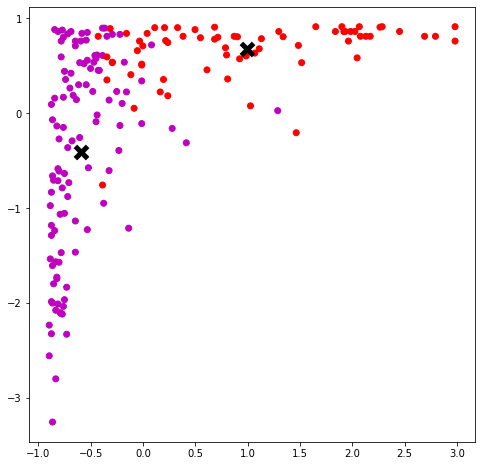

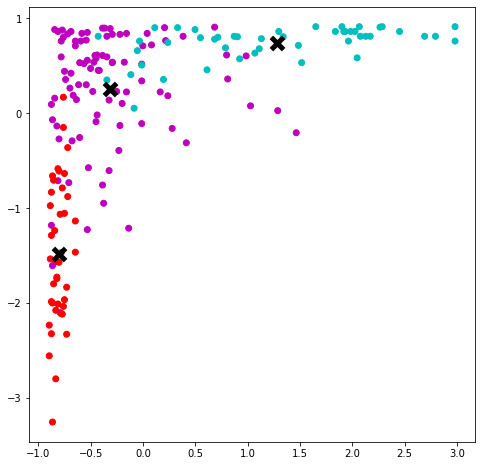

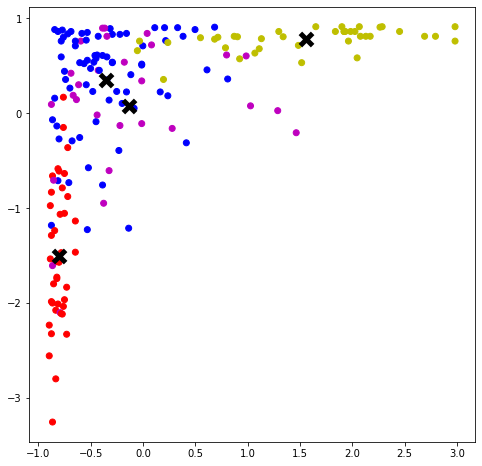

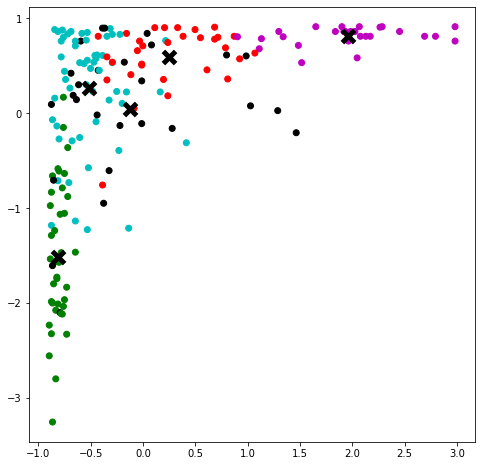

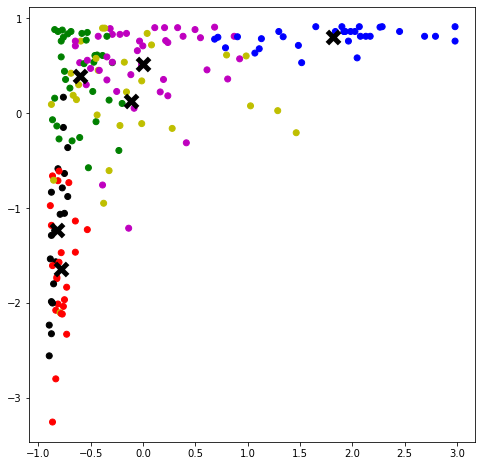

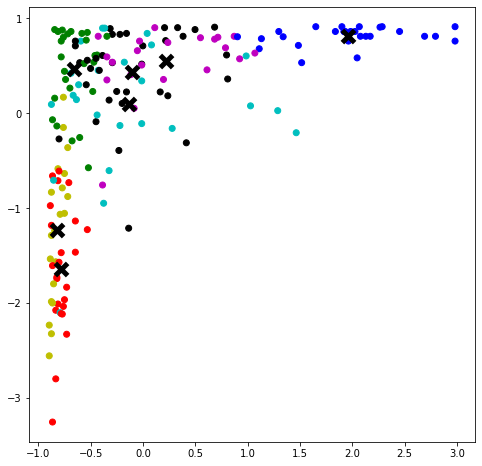

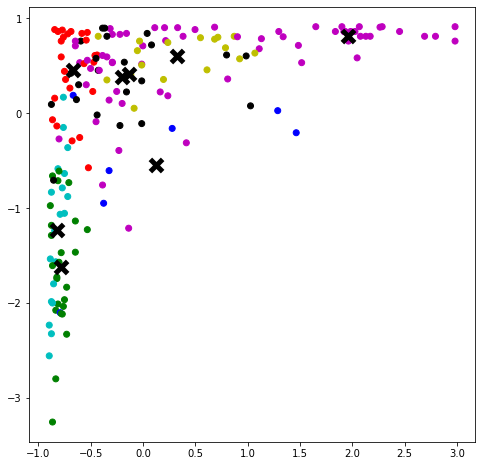

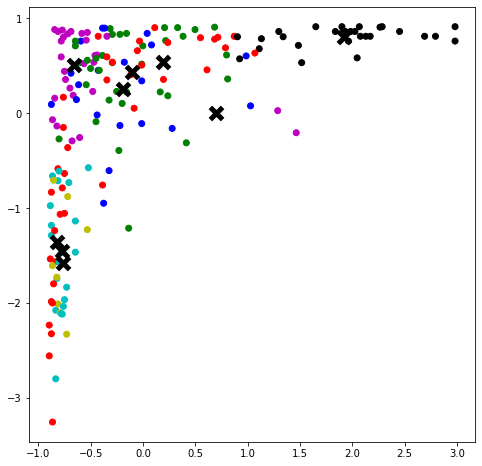

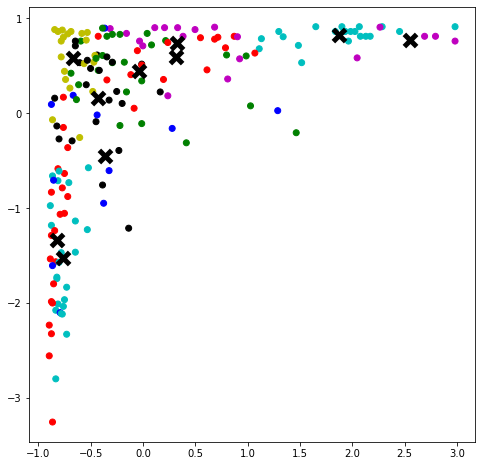

In [9]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans

K_MAX = 11 #Como nos piden, se crea un numero de clusters [2-10]

#Inicializamos los arrays que nos serviran para las medidas
score = np.zeros(K_MAX-2) #Esta hace refefrencia a Elbow
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)

#Rellenamos usando KMeans paritendo de los datos escalados. Esto es importante
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(X2_scaled)
    labels = km.labels_
    centers = km.cluster_centers_
    
    plot_clusters(X2_scaled, labels, centers) #Crea los centroides
    
    #Para las medidas que veremos posteriormente
    score[k-2] = -1 * km.score(X2_scaled)
    davies_boulding[k-2] = davies_bouldin_score(X2_scaled, km.labels_)
    silhouette[k-2] = silhouette_score(X2_scaled, km.labels_)

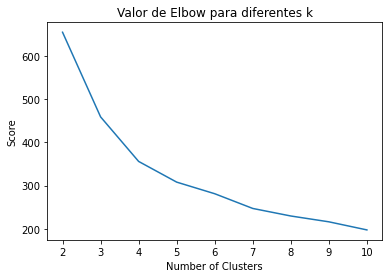

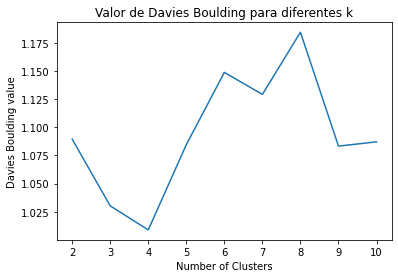

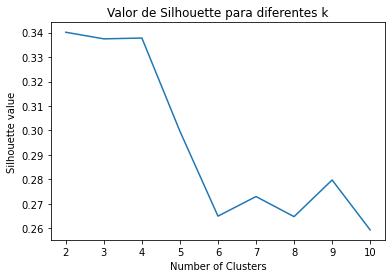

In [10]:
#Mostramos las tres gráficas

#score
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Valor de Elbow para diferentes k')
plt.show()

# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

Estudiemos a continuación los datos:
    
- El diagrama del codo (Elbow) busca un valor de K en el que la curva deja de descender tan rápidamente. En nuestro caso K = 4
- El diagrama de Davies Boulding busca un valor un valor mínimo. En nuestro caso K = 4
- El diagrama de Silhouette busca el número mayor. K = 4

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [11]:
#Tenemos en X2 los datos destransformados. Los hemos mostrado con anterioridad
#Ahora veamos la descripción de los diferentes clusters. Usaremos la librería pandas

#Crear dataframe con los puntos originales y añadimos la columna de clusters
#La mostramos transpuesta para una mejor visualización de los datos
df3 = df2
df3 = df3.assign(cluster=pd.Series(data=km.labels_))
df3.groupby(["cluster"]).describe().transpose()

#Como vemos, nos salen más de tres clusters por lo que vamos a elegir 3 de ellos diferentes

cluster                            0.0           1.0           2.0  \
GDP ($ per capita) count     10.000000     18.000000     20.000000   
                   mean   12200.000000   6466.666667  10705.000000   
                   std    11729.071196   7061.577894  10901.061030   
                   min      800.000000    700.000000   1300.000000   
                   25%     3250.000000   1275.000000   3650.000000   
                   50%     5550.000000   3800.000000   6400.000000   
                   75%    24725.000000   8650.000000  14625.000000   
                   max    29000.000000  25000.000000  36000.000000   
Literacy (%)       count     10.000000     18.000000     20.000000   
                   mean      87.180000     70.216667     86.715000   
                   std       14.616642     27.994038     17.685298   
                   min       57.700000     17.600000     41.700000   
                   25%       81.350000     48.375000     85.775000   
                   50%       91.400000     79.050000     94.300000   
                   75%       98.850000     94.000000     98.000000   
                   max      100.000000    100.000000     99.400000   
Phones (per 1000)  count     10.000000     18.000000     20.000000   
                   mean     255.530000    156.016667    282.675000   
                   std      225.448176    189.261522    238.323749   
                   min        3.600000      1.300000     10.900000   
                   25%       86.875000      4.150000    138.625000   
                   50%      153.250000     47.300000    236.650000   
                   75%      446.775000    287.900000    368.600000   
                   max      586.400000    585.500000    851.400000   
Agriculture        count     10.000000     18.000000     20.000000   
                   mean       0.100000      0.202111      0.109900   
                   std        0.081125      0.159379      0.112562   
                   min        0.022000      0.010000      0.001000   
                   25%        0.032000      0.064000      0.031250   
                   50%        0.083000      0.181500      0.084000   
                   75%        0.143750      0.331750      0.126750   
                   max        0.276000      0.550000      0.370000   
Industry           count     10.000000     18.000000     20.000000   
                   mean       0.284600      0.307389      0.269800   
                   std        0.111266      0.168196      0.114219   
                   min        0.070000      0.062000      0.032000   
                   25%        0.226000      0.197000      0.199750   
                   50%        0.298500      0.267500      0.294500   
                   75%        0.355750      0.374500      0.340250   
                   max        0.443000      0.666000      0.450000   
Service            count     10.000000     18.000000     20.000000   
                   mean       0.615200      0.490556      0.620350   
                   std        0.147248      0.174744      0.181089   
                   min        0.394000      0.250000      0.266000   
                   25%        0.526750      0.385750      0.512500   
                   50%        0.579000      0.461000      0.627500   
                   75%        0.694000      0.556750      0.709000   
                   max        0.900000      0.920000      0.954000   

cluster                            3.0           4.0           5.0  \
GDP ($ per capita) count      8.000000     18.000000     18.000000   
                   mean    7562.500000  10844.444444   9283.333333   
                   std     4736.164060  11270.378783   8786.101993   
                   min     1200.000000    700.000000    700.000000   
                   25%     4875.000000   2400.000000   3025.000000   
                   50%     7000.000000   7400.000000   6200.000000   
                   75%    10275.000000  12625.000000  15200.000000   
         

In [51]:
#Creamos un dataframe con los clusters que nos interesan. En nuestro caso 1, 5 y 9
df4 = df3.drop(df3[(df3.cluster != 1) & (df3.cluster != 5) & (df3.cluster != 9)].index)

df4 = df4.assign(cluster=pd.Series(data=km.labels_))
df4.groupby(["cluster"]).describe().transpose()

cluster                              1             5             9
GDP ($ per capita) count     18.000000     18.000000     11.000000
                   mean    6466.666667   9283.333333  10281.818182
                   std     7061.577894   8786.101993  10887.407238
                   min      700.000000    700.000000    700.000000
                   25%     1275.000000   3025.000000   1900.000000
                   50%     3800.000000   6200.000000   5000.000000
                   75%     8650.000000  15200.000000  15650.000000
                   max    25000.000000  31100.000000  30000.000000
Literacy (%)       count     18.000000     18.000000     11.000000
                   mean      70.216667     88.538889     85.345455
                   std       27.994038     11.599652     11.578805
                   min       17.600000     58.600000     65.500000
                   25%       48.375000     83.250000     77.300000
                   50%       79.050000     93.300000     89.100000
                   75%       94.000000     97.000000     93.600000
                   max      100.000000    100.000000     98.000000
Phones (per 1000)  count     18.000000     18.000000     11.000000
                   mean     156.016667    214.911111    200.218182
                   std      189.261522    186.191631    196.581809
                   min        1.300000      5.700000      0.200000
                   25%        4.150000     77.025000     37.400000
                   50%       47.300000    185.350000     91.200000
                   75%      287.900000    291.375000    337.850000
                   max      585.500000    614.600000    546.700000
Agriculture        count     18.000000     18.000000     11.000000
                   mean       0.202111      0.115000      0.161727
                   std        0.159379      0.114322      0.178712
                   min        0.010000      0.002000      0.001000
                   25%        0.064000      0.054250      0.021000
                   50%        0.181500      0.088500      0.125000
                   75%        0.331750      0.137000      0.248000
                   max        0.550000      0.448000      0.550000
Industry           count     18.000000     18.000000     11.000000
                   mean       0.307389      0.288111      0.274818
                   std        0.168196      0.153854      0.151944
                   min        0.062000      0.152000      0.092000
                   25%        0.197000      0.192500      0.129500
                   50%        0.267500      0.250000      0.246000
                   75%        0.374500      0.316750      0.422500
                   max        0.666000      0.801000      0.473000
Service            count     18.000000     18.000000     11.000000
                   mean       0.490556      0.591111      0.563364
                   std        0.174744      0.155934      0.184278
                   min        0.250000      0.197000      0.340000
                   25%        0.385750      0.520250      0.405500
                   50%        0.461000      0.627500      0.534000
                   75%        0.556750      0.718500      0.643000
                   max        0.920000      0.778000      0.906000

La tabla nos muestra la información acerca de los datos específicos para cada número de cluster. Podemos concluir por el número de elementos (count) y la media (mean) que el mejor número de cluster para nuestro ejemplo sería 5. Como los datos son poco legibles podemos mostrar por cada clase los datos para los diferentes clusters. En nuestro caso hemos decidido mostrar solamente el gráfico de densidades para el GDP pero se podría hacer por separado para todas las variables.

cluster
1    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
Name: GDP ($ per capita), dtype: object

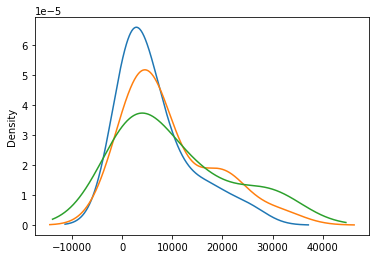

In [52]:
#Mostramos los valores para los diferentes clusters en la variables GDP. 
#Esto se podría hacer con todas las variables de la tabla

#No aporta demasiado a la explicación pero podemos buscar una correlación de los datos con el número de clusters obtenidos. 
#Como podemos comprobar en nuestro ejemplo del GDP, la mayoría de los datos obtenidos están cerca de 5000 y, cuantos más 
#clusters, menos es la media de los datos.

df4.groupby(["cluster"])["GDP ($ per capita)"].plot.density()